# Evaluation

## Objectif

L'objectif de cette évaluation est de parvenir à détecter si une requête est une tentative d'intrusion ou bien une requête légitime.

Votre modèle devrait obtenir un score de 95%.

## Livrable

Vous devrez compléter ce notebook Jupyter et répondre aux questions du Google Form associé [EPSI - PARIS - 2026 - TRDE707 - TP Noté](https://forms.gle/ZhcULFdgYDDm4P7Q9).

## Dépendances et modules

Les modules disponibles pour l'exécution de ce notebook sont :
* pandas
* scikit-learn
* matplotlib

## Source de données

Les sources de données sont des fichiers au format CSV. Vous pouvez les télécharger depuis le dossier [trde707-datasets](https://drive.google.com/drive/folders/1YmNxtXDhiyzoyH6R6twWudgdjUAYvsNo?usp=sharing).

L'archive public_network_log.zip contient un unique fichier public_network_log.csv qui représente un log de requêtes identifiées comme une tentative d'intrusion ou une requête légitime.

L'archive dbip-country-lite-2026-01.zip contient un unique fichier dbip-country-lite-2026-01.csv qui associe à chaque plage d'IP un code Pays. Cette base de données est issue du portail [dbip](https://db-ip.com/db/format/ip-to-country/csv.html).


Charger les données


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

public_network = pd.read_csv("./datasets/public_network_logs.csv", delimiter=",")
public_network.describe()


,Port,Payload_Size,Intrusion
count,7076.000000,7076.000000,7076.000000
mean,863.928349,1599.082956,0.095534
std,3971.806686,915.634231,0.293972
min,21.000000,0.000000,0.000000
25%,22.000000,842.000000,0.000000
50%,53.000000,1580.000000,0.000000
75%,80.000000,2316.750000,0.000000
max,31337.000000,4997.000000,1.000000


Afficher les effectifs de la colonne `Intrusion`.


In [ ]:
public_network['Intrusion'].value_counts()

Afficher les 2 représentations les plus adaptées à la colonne `Payload_Size`.


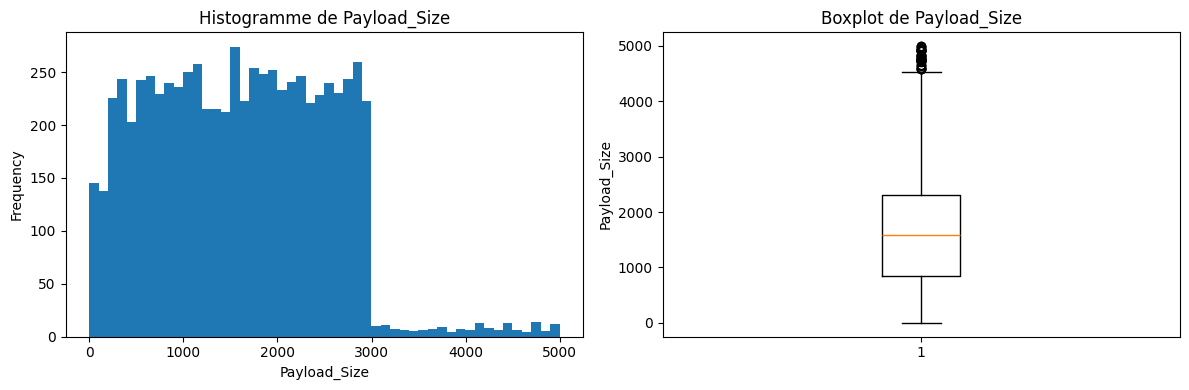

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(public_network['Payload_Size'], bins=30, edgecolor='black')
plt.title('Distribution des tailles de Payload')
plt.xlabel('Taille du Payload')
plt.ylabel('Fréquence')
plt.show()


plt.figure(figsize=(10, 5))
plt.boxplot(public_network['Payload_Size'], vert=False)
plt.title('Boxplot des tailles de Payload')
plt.xlabel('Taille du Payload')
plt.show()

Afficher la représentation la plus adaptée à `Port`.


In [ ]:
top_ports = public_network['Port'].value_counts().head(15)

plt.figure(figsize=(10, 6))

plt.bar(top_ports.index.astype(str), top_ports.values, color='skyblue', edgecolor='black')

plt.title('Top 15 des Ports les plus fréquents')
plt.xlabel('Numéro de Port')
plt.ylabel('Nombre d\'occurrences')
plt.show()

Afficher sur un même graphique les variables `Payload_Size`, `Port` et `Intrusion`.


In [ ]:
plt.figure(figsize=(10, 6))

sc = plt.scatter(public_network['Payload_Size'], 
                 public_network['Port'], 
                 c=public_network['Intrusion'], 
                 cmap='coolwarm', 
                 alpha=0.6)

plt.title('Relation : Payload_Size vs Port (Coloré par Intrusion)')
plt.xlabel('Payload_Size')
plt.ylabel('Port')

cbar = plt.colorbar(sc)
cbar.set_label('Intrusion (0=Normal, 1=Attaque)')

plt.show()

Sélectionner les colonnes pour lesquelles un encodage est nécessaire.


In [ ]:


colonnes_a_encoder = public_network.select_dtypes(include=['object']).columns

print("Colonnes nécessitant un encodage :")
print(colonnes_a_encoder)

Sélectionner les colonnes pour lesquelles une standardisation est nécessaire.


In [ ]:
colonnes_a_standardiser = public_network.select_dtypes(include=['number']).drop(columns=['Intrusion'], errors='ignore').columns

print("Colonnes nécessitant une standardisation :")
print(colonnes_a_standardiser)

Sélectionner un modèle et l'entrainer.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

y = public_network['Intrusion']

X = public_network.drop(columns=['Intrusion', 'Scan_Type', 'Source_IP', 'Destination_IP', 'User_Agent', 'Status'], errors='ignore')

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

print("Le modèle KNN a été entraîné avec succès.")
print(f"Taille du jeu d'entraînement : {X_train.shape}")
print(f"Taille du jeu de test : {X_test.shape}")

Evaluer les performances de votre modèle.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2%}")

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Choisir un affichage permettant de restituer les performances du modèle sélectionné.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion")
plt.show()